In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Esercizio 1
Nel file `covid-19_gen1.txt` è presente l'RNA di un virus SARS-COV-2. L'RNA è una sequenza in cui si alternano 4 simboli (detti nucleotidi): A, T, C, G.
L'RNA del  virus SARS-COV-2 contiene 29903 nucleotidi. Leggi il file e crea un array di Numpy contenente i 29903 elementi, uno per ogni nucleotide secondo l'ordine contenuto nel file.

Utilizza Numpy per:
1. calcolare la frequenza assoluta di ogni nucleotide;
2. calcolare la frequenza assoluta della sequenza A,T,G;
4. sapendo che la sequenza A,T,G,T,T,T,G,T,T,T,T,T sta all'inzio del segmento di RNA che codifica la proteina spike, individuare se la proteina spike è presente nell'RNA: in caso affermativo ottenere la posizione iniziale della proteina spike all'interno dell'array. *SUGGERIMENTO*: costruisci la matrice contenente tutte le possibili sequenze di 12 nucleotidi, nella quale ogni riga rappresenta una sequenza consecutiva di 12 nucleotidi.

In [3]:
f = open("./covid-19_gen1.txt", "r")
s = ""
for l in f.readlines():
    s=s+l[:-1]
f.close
rna = np.array([n for n in s])
rna

array(['A', 'T', 'T', ..., 'A', 'A', 'A'], dtype='<U1')

In [4]:
# 1

np.count_nonzero(rna=="A")
# ...

8954

In [8]:
# 2

rna_0 = rna[2:]
rna_1 = np.roll(rna, 1)[2:]
rna_2 = np.roll(rna, 2)[2:]

"""
rna_0 = ABCD
rna_1 = DABC
rna_2 = CDAB
"""

np.count_nonzero(np.logical_and(np.logical_and(rna_1 == "T", rna_2 == "A"), rna_0 == "G"))

725

In [11]:
# 3
aligning_seq = "ATGTTTGTTTTT"
temp = [i+j for i in range(0, len(rna)-12+1) for j in range(0,12)]
#print(temp)

seq_12 = rna[temp].reshape((-1, 12))

a_seq = np.array([n for n in aligning_seq])

seq_12[np.all(seq_12==a_seq, axis=1)]
# np.all restituiste true solo se tutti gli elementi sono true, gli si può specifcare per che asse lavorare

array([['A', 'T', 'G', 'T', 'T', 'T', 'G', 'T', 'T', 'T', 'T', 'T']],
      dtype='<U1')

### Esercizio 2
Il file `prezzi.cvs` contiene le serie storiche mensili dei prezzi di alcuni generi alimentari dal Settembre 2011 a Dicembre 2016. Caricare all'interno di opportuni array di Numpy soltanto le serie dei prezzi utili a rispondere alle domande seguenti.

1. Per il periodo Settembre 2011 - Dicembre 2016 calcola il prezzo di una spesa composta da:
    - 5kg di Farina di frumento
    - 1 l di Latte fresco
    - 1 kg di Caffè tostato
    - 0.5 kg di Parmigiano Reggiano
2. Per la spesa del punto 1 calcola se ci sono dei minimi locali nel prezzo e se si quando (anno, mese).

3. Traccia un grafico che mostri l'andamento del prezzo del Caffè tostato (gr. 1000).

4. Calcola un array con le variazioni di prezzo mensile per il Caffè tostato (gr. 1000).

5. Calcola un array con le variazioni di prezzo mensile per il Burro (gr. 1000).

6. Traccia un grafico a dispersione che mostri la variazione di prezzo mensile per il Caffè tostato (gr. 1000) rispetto a quella del Burro (gr. 1000).

In [12]:
import pandas as pd

"""
È utilizzata per manipolare dati a forma di tabelle.
Utilizza numpy perché è molto efficiente.
Permette di manipolare dati in forma tabellare.
Permette anche di caricarli e salvarli.
È stata creata per gestire le forme di dati più usati (CSV, TXT, DB)
"""

In [16]:
data = pd.read_csv('./prezzi.csv', sep=";", header=0)
"""
Questa funzione permette di leggere i csv.
Questa funzione crea anche una colonna dove contiene gli indici di riga.
Questa variabile data è un dataframe (è un oggetto a cui corrisponde una tabella 
di dati che contiene il nome delle colonne e gli indici di riga dei dati).
"""

#data.head()
#data.info()

data["Acqua minerale (cl. 900)"].values 
# .values trasforma il risultato ritornato da data in un array numpy

array([2.54, 2.54, 2.54, 2.5 , 2.5 , 2.48, 2.49, 2.49, 2.52, 2.52, 2.52,
       2.52, 2.52, 2.49, 2.5 , 2.5 , 2.48, 2.49, 2.49, 2.52, 2.52, 2.52,
       2.52, 2.52, 2.49, 2.5 , 2.51, 2.56, 2.55, 2.55, 2.55, 2.54, 2.55,
       2.52, 2.52, 2.28, 2.26, 2.33, 2.35, 2.35, 2.34, 2.4 , 2.4 , 2.4 ,
       2.43, 2.42, 2.43, 2.43, 2.42, 2.42, 2.34, 2.34, 2.33, 2.37, 2.49,
       2.37, 2.47, 2.49, 2.49])

In [19]:
# 1

prezzo_farina = data["Farina di frumento (gr. 1000)"]*5
prezzo_latte = data["Latte fresco (cl. 100)"]*10
prezzo_caffe = data["Caffè tostato (gr. 1000)"]
prezzo_parmigiano = data["Parmigiano Reggiano (gr. 1000)"]/2

prezzi_tot = (prezzo_farina + prezzo_latte + prezzo_caffe + prezzo_parmigiano).values
prezzi_tot

array([44.39 , 44.39 , 43.64 , 43.47 , 43.485, 43.47 , 43.295, 43.225,
       43.64 , 44.15 , 43.81 , 43.82 , 43.76 , 43.7  , 43.47 , 43.485,
       43.47 , 43.295, 43.225, 43.64 , 44.15 , 43.81 , 43.82 , 43.76 ,
       43.7  , 43.81 , 43.7  , 44.64 , 44.38 , 44.57 , 44.71 , 44.37 ,
       44.275, 44.33 , 44.   , 44.115, 44.345, 44.315, 44.345, 44.385,
       44.25 , 43.73 , 43.645, 43.665, 43.66 , 43.87 , 44.195, 42.245,
       42.215, 42.255, 41.39 , 41.29 , 41.32 , 41.31 , 40.745, 41.16 ,
       41.23 , 40.915, 40.885])

In [21]:
# 2

arr0 = prezzi_tot[1:-1]
arr1 = np.roll(prezzi_tot, -1)[1:-1]
arr2 = np.roll(prezzi_tot, 1)[1:-1]

min_locali = np.logical_and(arr0 < arr1, arr0 < arr2)

mese = data["mese"][1:-1][min_locali].values
anno = data["anno"][1:-1][min_locali].values

print(anno)
print(mese)

[2011 2012 2012 2012 2013 2013 2013 2013 2014 2014 2014 2015 2015 2015
 2016 2016 2016]
['Dicembre' 'Aprile' 'Luglio' 'Dicembre' 'Aprile' 'Luglio' 'Ottobre'
 'Dicembre' 'Febbraio' 'Giugno' 'Agosto' 'Marzo' 'Agosto' 'Ottobre'
 'Febbraio' 'Maggio' 'Agosto']


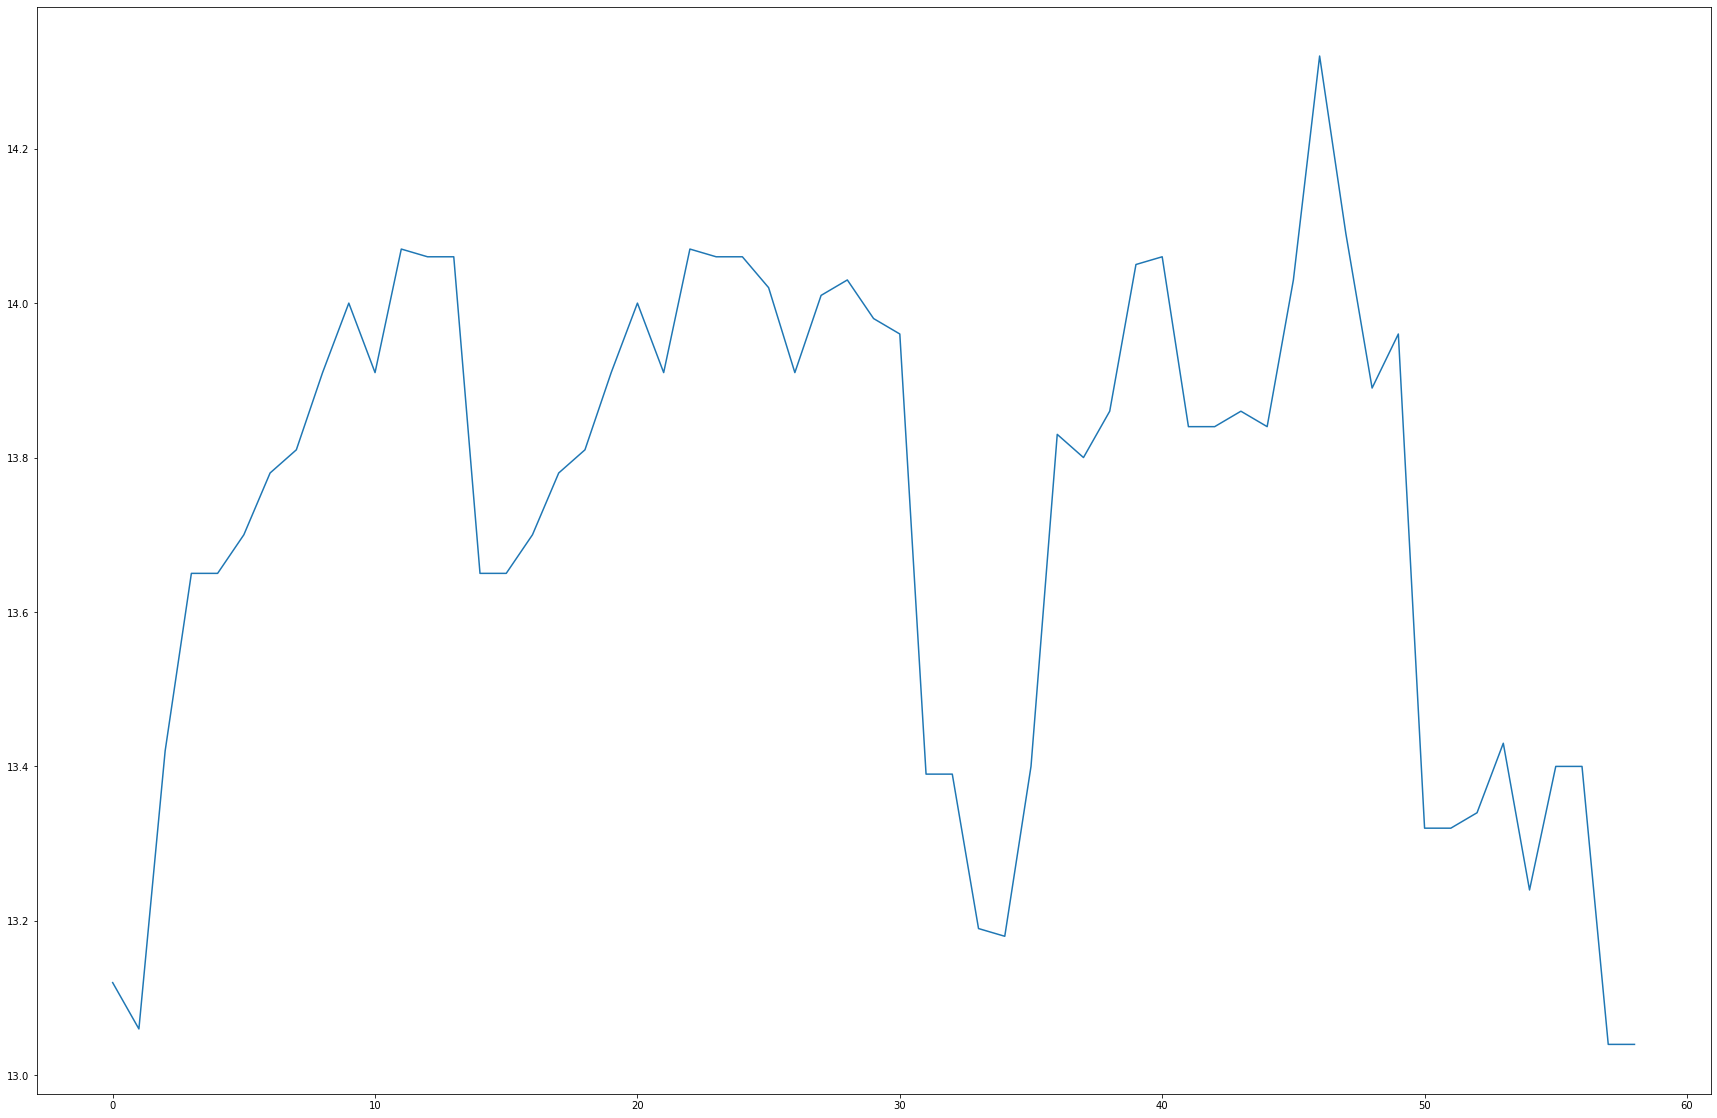

In [22]:
# 3

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,20))
ax.plot(data["Caffè tostato (gr. 1000)"])
plt.show()

In [23]:
# 4

variazione_caffe = np.diff(data["Caffè tostato (gr. 1000)"].values)
variazione_caffe

array([-0.06,  0.36,  0.23,  0.  ,  0.05,  0.08,  0.03,  0.1 ,  0.09,
       -0.09,  0.16, -0.01,  0.  , -0.41,  0.  ,  0.05,  0.08,  0.03,
        0.1 ,  0.09, -0.09,  0.16, -0.01,  0.  , -0.04, -0.11,  0.1 ,
        0.02, -0.05, -0.02, -0.57,  0.  , -0.2 , -0.01,  0.22,  0.43,
       -0.03,  0.06,  0.19,  0.01, -0.22,  0.  ,  0.02, -0.02,  0.19,
        0.29, -0.23, -0.2 ,  0.07, -0.64,  0.  ,  0.02,  0.09, -0.19,
        0.16,  0.  , -0.36,  0.  ])

In [24]:
# 5

variazione_burro = np.diff(data["Burro (gr. 1000)"])
variazione_burro

array([-0.08, -0.02,  0.19,  0.07, -0.02,  0.15, -0.12,  0.06,  0.12,
        0.13,  0.04,  0.11,  0.02, -0.56,  0.07, -0.02,  0.15, -0.12,
        0.06,  0.12,  0.13,  0.04,  0.11,  0.02, -0.09,  0.08,  0.05,
        0.34,  0.15,  0.13,  0.  ,  0.  , -0.16,  0.06, -0.36, -0.2 ,
        0.19,  0.04,  0.  , -0.1 , -0.07,  0.  ,  0.11,  0.01,  0.32,
       -0.31, -0.22,  0.28, -0.11, -0.36,  0.08,  0.01, -0.11, -0.33,
        0.12, -0.11,  0.03, -0.08])

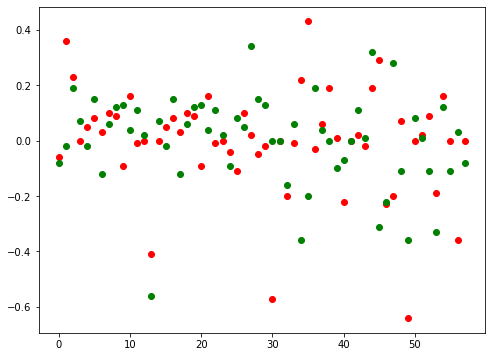

In [29]:
# 6

x=np.arange(0, len(data["anno"])-1)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x,variazione_caffe,c="red")
ax.scatter(x,variazione_burro,c="green")

plt.show()

### Esercizio 3
L'array `array_punti` è un array di Numpy come quello sottostante, contenente quattro coppie di coordinate spaziali intere scelte a caso, che rappresentano quattro punti nel piano. Essi sono i quattro vertici di una figura geometrica piana, letti in verso anti-orario. Facendo uso di Numpy:
1. crea una funzione che verifichi se la figura geometrica è un quadrilatero, un triangolo, un segmento oppure un punto;
2. crea una funzione che calcoli il perimetro della figura.

In [34]:
array_punti= np.random.randint(0.,5,(4,2))
array_punti

array([[0, 1],
       [4, 1],
       [1, 3],
       [1, 3]])

In [35]:
# 1

def tipo_forma(array_punti):
    punti_non_uguali = np.unique(array_punti, axis=0) # confronta per righe
    if len(punti_non_uguali) == 1: return "punto"
    elif len(punti_non_uguali) == 2: return "segmento"
    elif len(punti_non_uguali) == 3: return "triangolo"
    elif len(punti_non_uguali) == 4: return "quadrato"
    
tipo_forma(array_punti)

'triangolo'

In [44]:
# 2

np.sum(np.sum((array_punti - np.roll(array_punti, 1, axis=0))**2, axis=1)**1/2)

"""

Noi abbiamo:

x1 y1
x2 y2
x3 y3
x4 y4

Poi abbiamo prodotto l'array ruotato:

x2 y2
x3 y3
x4 y4
x1 y1

Poi abbiamo fatto la diffrenza tra i due:

Δx1 Δy1
Δx2 Δy2
Δx3 Δy3
Δx4 Δy4

Poi abbiamo fatto i quadrati

Poi abbiamo fatto la somma dei quadrati

Poi abbiamo fatto la radice quadrata sulle somme

Poi abbiamo sommato le somme tra di loro

"""

"\n\nNoi abbiamo:\n\nx1 y1\nx2 y2\nx3 y3\nx4 y4\n\nPoi abbiamo prodotto l'array ruotato:\n\nx2 y2\nx3 y3\nx4 y4\nx1 y1\n\nPoi abbiamo fatto la diffrenza tra i due:\n\nΔx1 Δy1\nΔx1 Δy1\n\nPoi abbiamo fatto i quadrati \n\n\npoi abbiamo fatto la somma dei quadrati\n\npoi abbiamo fatto la radrice quadrata sulle somme\n\ne poi abbiamo sommato le somme tra di loro\n"

### Esercizio 4 (BONUS)
Usa Numpy per calcolare una approssimazione dell'integrale definito della funzione f(x) = exp(-x^2) da 0 a 1. Suddividi l'intervallo [0,1] in n sotto-intervalli e per ogni sotto-intervallo approssima l'area sottesa dalla funzione con l'area del corrispondente rettangolo.
![rettangoli](rettangolo.png)
Calcola il risultato per n=10, 100, 10000, 100000.